In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Read data from csv file 'student-por.csv'
port_data = pd.read_csv('student-por.csv', sep=';')

In [4]:
port_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# checking the shape of the dataset
port_data.shape

(649, 33)

In [6]:
# Making dummy variables in portugese data and saving

portdata_dummy = pd.get_dummies(port_data,columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'], drop_first=True)


portdata_dummy.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


In [7]:
# Starting Regression

# PX - selecting only the predictor variables and not the response variable G3 including G1 and G2

PX = portdata_dummy[['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']]


PX.head()

print(PX.shape)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


(649, 39)


In [8]:
# listing the columns of portuguese_dummy dataset

list(portdata_dummy.columns)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']

In [9]:
# Y dependent variable of portdata_dummy

PY = portdata_dummy['G3']

PY.head()


0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

,age,G1,G2,G3,absences,failures
age,1.000000,-0.174322,-0.107119,-0.106505,0.149998,0.319968
G1,-0.174322,1.000000,0.864982,0.826387,-0.147149,-0.384210
G2,-0.107119,0.864982,1.000000,0.918548,-0.124745,-0.385782
G3,-0.106505,0.826387,0.918548,1.000000,-0.091379,-0.393316
absences,0.149998,-0.147149,-0.124745,-0.091379,1.000000,0.122779
failures,0.319968,-0.384210,-0.385782,-0.393316,0.122779,1.000000


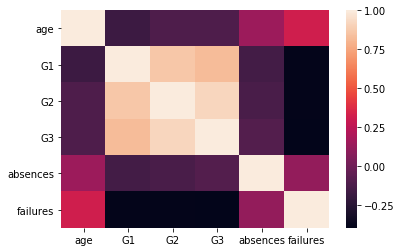

In [10]:
# checking correlation between numeric variables
PXGrade = portdata_dummy[['age','G1','G2','G3','absences','failures']]
correlation1 = PXGrade.corr()
correlation1

# heatmap of numeric variables
import seaborn
seaborn.heatmap(correlation1)



In [11]:
PXGrade.head()

,age,G1,G2,G3,absences,failures
0,18,0,11,11,4,0
1,17,9,11,11,2,0
2,15,12,13,12,6,0
3,15,14,14,14,0,0
4,16,11,13,13,0,0


In [12]:
#Excluding G1 and G2 as they are higly correlated with G3

# PORTUGUESE REGRESSION MODEL

import statsmodels.api as sm

PX = sm.add_constant(PX)

mod1 = sm.OLS(PY,PX)

fii1 = mod1.fit()
fii1

In [13]:
som1 = fii1.summary()

In [14]:
som1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     8.797
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           3.27e-38
Time:                        18:54:39   Log-Likelihood:                -1536.5
No. Observations:                 649   AIC:                             3153.
Df Residuals:                     609   BIC:                             3332.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.6815      1.985      4.373      0.000       4.783      12.580
age                   0.1562      0.102      1.528      0.127      -0.045       0.357
Medu                  0.0353      0.151      0.233      0.816      -0.262       0.332
Fedu                  0.1669      0.138      1.211      0.226      -0.104       0.437
traveltime            0.0625      0.159      0.393      0.695      -0.250       0.375
studytime             0.4067      0.140      2.906      0.004       0.132       0.682
failures             -1.4122      0.205     -6.906      0.000      -1.814      -1.011
famrel                0.1616      0.116      1.391      0.165      -0.066       0.390
freetime             -0.1378      0.112     -1.226      0.221      -0.358       0.083
goout                -0.0661      0.107     -0.615      0.539      -0.277       0.145
Dalc                 -0.2048      0.153     -1.338      0.181      -0.505       0.096
Walc                 -0.0815      0.118     -0.688      0.492      -0.314       0.151
health               -0.1874      0.077     -2.428      0.015      -0.339      -0.036
absences             -0.0381      0.025     -1.531      0.126      -0.087       0.011
school_MS            -1.2003      0.267     -4.490      0.000      -1.725      -0.675
sex_M                -0.6331      0.250     -2.532      0.012      -1.124      -0.142
address_U             0.3227      0.262      1.233      0.218      -0.191       0.837
famsize_LE3           0.3025      0.245      1.235      0.217      -0.179       0.784
Pstatus_T             0.1769      0.347      0.510      0.610      -0.504       0.858
Mjob_health           0.9015      0.538      1.677      0.094      -0.154       1.957
Mjob_other            0.0504      0.303      0.166      0.868      -0.544       0.645
Mjob_services         0.4205      0.373      1.127      0.260      -0.312       1.153
Mjob_teacher          0.5118      0.502      1.020      0.308      -0.474       1.498
Fjob_health          -0.6122      0.752     -0.814      0.416      -2.090       0.865
Fjob_other           -0.1844      0.456     -0.404      0.686      -1.080       0.712
Fjob_services        -0.6434      0.479     -1.343      0.180      -1.585       0.298
Fjob_teacher          0.5797      0.672      0.862      0.389      -0.741       1.900
reason_home           0.0505      0.285      0.177      0.859      -0.509       0.610
reason_other         -0.4349      0.368     -1.183      0.237      -1.157       0.287
reason_reputation     0.2177      0.298      0.730      0.465      -0.368       0.803
guardian_mother      -0.3385      0.265     -1.276      0.202      -0.859       0.182
guardian_other        0.1050      0.532      0.197      0.844      -0.939       1.149
schoolsup_yes        -1.3112      0.364     -3.602      0.000      -2.026

In [15]:
# Creating PX2 with all the variables including G3

PX2 = portdata_dummy[['age',
 'Medu',
 'Fedu',
 'traveltime',
'studytime',
 'failures',
 'famrel',
'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']]

PX2.head()



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


In [16]:
# Portuguese Regression Model with Interaction effects
# Including Interaction Terms

import statsmodels.formula.api as smf
model_interaction = smf.ols(formula='G3 ~ studytime + failures + health + school_MS + sex_M + schoolsup_yes + higher_yes + studytime:failures + studytime:health + studytime:school_MS + studytime:sex_M + studytime:schoolsup_yes + studytime:higher_yes + failures:health + failures:school_MS + failures:sex_M + failures:schoolsup_yes + failures:higher_yes + health:school_MS + health:sex_M + health:schoolsup_yes + health:higher_yes + school_MS:sex_M +  school_MS:schoolsup_yes + school_MS:higher_yes + sex_M:schoolsup_yes + sex_M:higher_yes', data=PX2).fit()
summary = model_interaction.summary()
summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     11.37
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           7.88e-39
Time:                        18:55:22   Log-Likelihood:                -1551.1
No. Observations:                 649   AIC:                             3158.
Df Residuals:                     621   BIC:                             3284.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   9.6265      1.724      5.583      0.000       6.241      13.012
studytime                   0.3822      0.608      0.628      0.530      -0.812       1.576
failures                   -1.9320      0.912     -2.119      0.034      -3.722      -0.142
health                      0.0085      0.340      0.025      0.980      -0.660       0.677
school_MS                  -0.8621      1.080     -0.798      0.425      -2.983       1.259
sex_M                      -0.1956      1.084     -0.180      0.857      -2.325       1.934
schoolsup_yes              -1.5326      1.497     -1.024      0.306      -4.472       1.406
higher_yes                  3.6606      1.575      2.324      0.020       0.567       6.754
studytime:failures         -0.1000      0.328     -0.304      0.761      -0.745       0.545
studytime:health           -0.0002      0.097     -0.002      0.999      -0.191       0.190
studytime:school_MS         0.3593      0.310      1.159      0.247      -0.250       0.968
studytime:sex_M            -0.2732      0.280     -0.975      0.330      -0.823       0.277
studytime:schoolsup_yes    -0.6878      0.461     -1.493      0.136      -1.593       0.217
studytime:higher_yes        0.2073      0.508      0.408      0.683      -0.790       1.205
failures:health             0.2233      0.150      1.488      0.137      -0.071       0.518
failures:school_MS         -0.3565      0.412     -0.865      0.388      -1.166       0.453
failures:sex_M              0.4143      0.433      0.956      0.339      -0.437       1.265
failures:schoolsup_yes      1.5609      0.628      2.485      0.013       0.327       2.794
failures:higher_yes        -0.6825      0.437     -1.561      0.119      -1.541       0.176
health:school_MS           -0.0339      0.163     -0.208      0.835      -0.354       0.286
health:sex_M                0.0219      0.159      0.138      0.891      -0.291       0.334
health:schoolsup_yes        0.3179      0.266      1.195      0.233      -0.205       0.840
health:higher_yes          -0.2745      0.287     -0.956      0.339      -0.838       0.289
school_MS:sex_M            -0.1973      0.498     -0.396      0.692      -1.175       0.781
school_MS:schoolsup_yes     0.9170      0.951      0.964      0.335      -0.951       2.785
school_MS:higher_yes       -1.2122      0.778     -1.558      0.120      -2.740       0.316
sex_M:schoolsup_yes        -0.2618      0.836     -0.313      0.754      -1.903       1.379
sex_M:higher_yes           -0.0048      0.791     -0.006      0.995      -1.558       1.549
==============================================================================
Omnibus:                      116.763   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              35

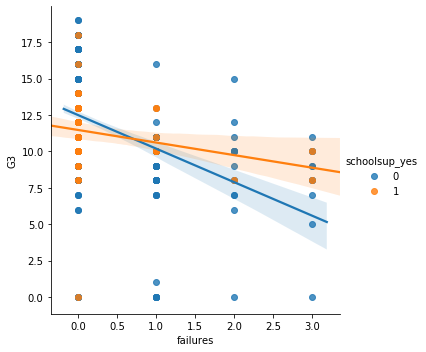

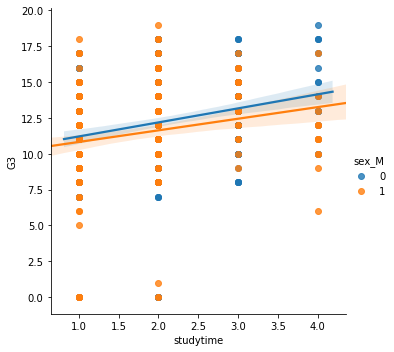

In [21]:
# Interaction is present between failures*schoolsup_yes on G3
import seaborn
seaborn.lmplot(y='G3', x='failures', hue='schoolsup_yes', data=PX2)


# No interaction is present between studytime*sex_M on G3
seaborn.lmplot(y='G3', x='studytime', hue='sex_M', data=PX2)


